In [2]:
"""DATA CLEANING PORTFOLIO"""

# Import libraries
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

# %matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) # Adjust the configuration of the plots we will create

In [ ]:
# Read in the data
df = pd.read_csv('movies.csv')
# Look at the first five rows of the data
df.head()

In [ ]:
# see any missing data
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print ('{} - {}%'. format(col, pct_missing))

# See data types
df.dtypes

In [ ]:
#change data type of columns
df.replace([np.inf, -np.inf], np.finfo('float').max, inplace=True)
df['budget'].fillna(0, inplace=True)
df['budget'] = df['budget'].astype('int64')
df['gross'].fillna(0, inplace=True)
df['gross'] = df['gross'].astype('int64')

df.head()

In [ ]:
# Create year correct columns
df['yearcorrect'] = df['released'].str.extract(pat = '([0-9]{4})').astype('str')
df.head()

In [6]:
df = df.sort_values(by=['gross'], inplace = False, ascending=False)

In [7]:
pd.set_option('display.max_rows', None)

In [6]:
# Drop any duplicates
df['company'].drop_duplicates().sort_values(ascending=False)

7129                                thefyzz
5664                            micro_scope
6412               iDeal Partners Film Fund
4007                               i5 Films
6793                             i am OTHER
                       ...                 
3748                     1+2 Seisaku Iinkai
3024                        .406 Production
7525    "Weathering With You" Film Partners
4345        "DIA" Productions GmbH & Co. KG
7657                                    NaN
Name: company, Length: 2386, dtype: object

In [ ]:
# Budget high correlation
# Company high correlation

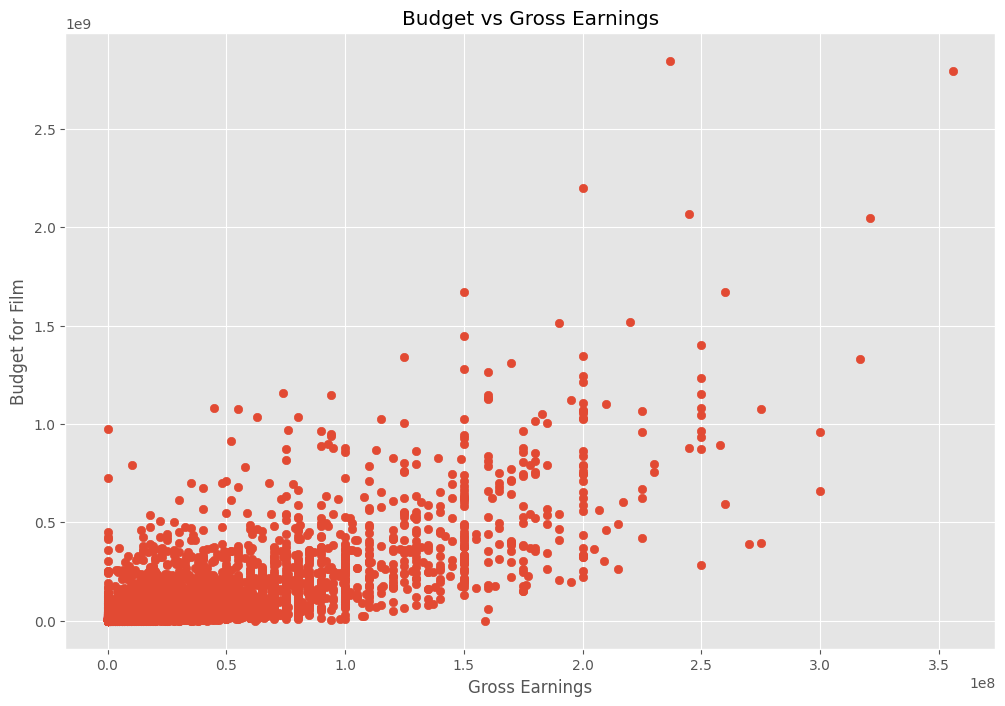

In [8]:
# Scatter plot w budget vs gross
plt.scatter (x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross Earnings')

plt.xlabel('Gross Earnings')

plt.ylabel('Budget for Film')
plt.show()

In [9]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018


<AxesSubplot: xlabel='budget', ylabel='gross'>

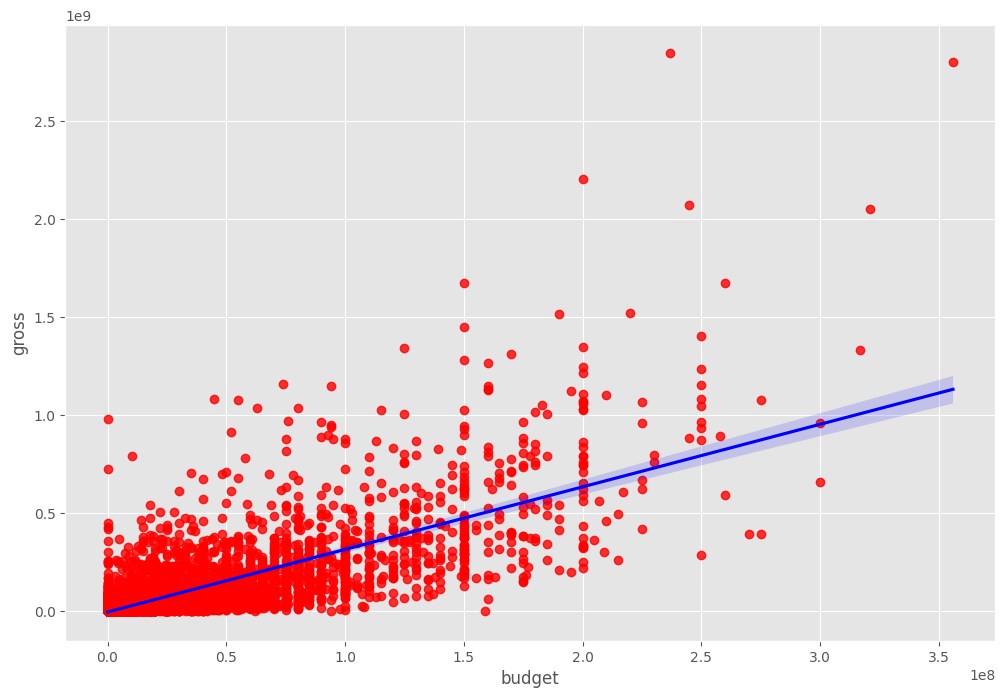

In [12]:
# Plot budget vs gross using seaborn

sns.regplot(x='budget', y='gross', data=df, scatter_kws={'color' : 'red'}, line_kws={'color': 'blue'})

In [9]:
# Looking at correlation
df.corr() #pearson (default), kendall, spearman

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_16640\3559374545.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr() #pearson (default), kendall, spearman


,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222945,0.309212,0.261900,0.120811
score,0.097995,1.000000,0.409182,0.055665,0.186392,0.399451
votes,0.222945,0.409182,1.000000,0.486862,0.632834,0.309212
budget,0.309212,0.055665,0.486862,1.000000,0.750157,0.269510
gross,0.261900,0.186392,0.632834,0.750157,1.000000,0.245235
runtime,0.120811,0.399451,0.309212,0.269510,0.245235,1.000000


In [14]:
#high correlation between budget vs gross

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_16640\407041368.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr(method='pearson')


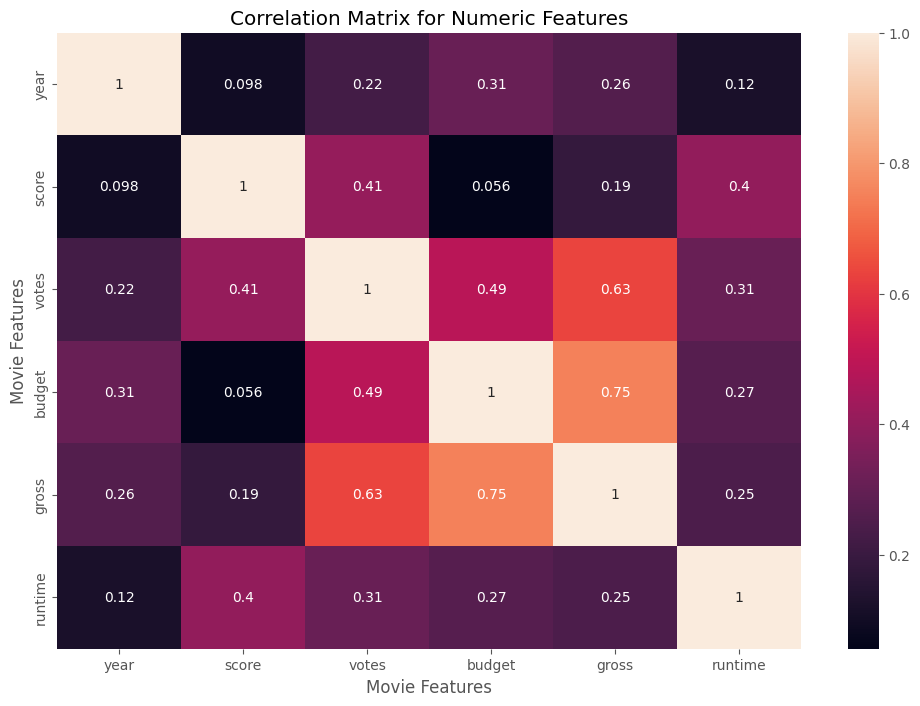

In [10]:
correlation_matrix = df.corr(method='pearson')
sns.heatmap (correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [16]:
#Looking at Company/ Country - numerise Company name to a number
df_numerized = df

for col_name in df_numerized:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,533,5,0,2009,696,7.8,1100000.0,1155,1778,2334,55,237000000,2847246203,2253,162.0,29
7445,535,5,0,2019,183,8.4,903000.0,162,743,2241,55,356000000,2797501328,1606,181.0,39
3045,6896,5,6,1997,704,7.8,1100000.0,1155,1778,1595,55,200000000,2201647264,2253,194.0,17
6663,5144,5,0,2015,698,7.8,876000.0,1125,2550,524,55,245000000,2069521700,1540,138.0,35
7244,536,5,0,2018,192,8.4,897000.0,162,743,2241,55,321000000,2048359754,1606,149.0,38


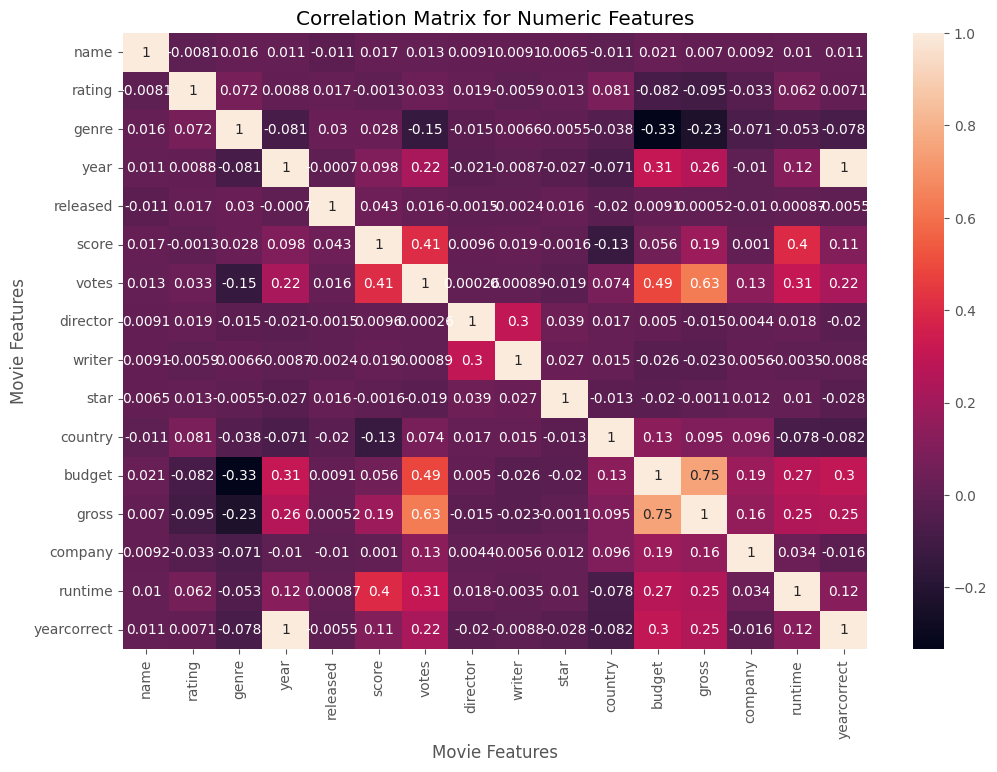

In [12]:
correlation_matrix = df_numerized.corr(method='pearson')
sns.heatmap (correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [13]:
correlation_mat = df_numerized.corr()
corr_pairs = correlation_mat.unstack()

corr_pairs

name         name           1.000000
             rating        -0.008069
             genre          0.016355
             year           0.011453
             released      -0.011311
             score          0.017097
             votes          0.013088
             director       0.009079
             writer         0.009081
             star           0.006472
             country       -0.010737
             budget         0.020548
             gross          0.006989
             company        0.009211
             runtime        0.010392
             yearcorrect    0.011134
rating       name          -0.008069
             rating         1.000000
             genre          0.072423
             year           0.008779
             released       0.016613
             score         -0.001314
             votes          0.033225
             director       0.019483
             writer        -0.005921
             star           0.013405
             country        0.081244
 

In [14]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

genre        budget        -0.334021
budget       genre         -0.334021
gross        genre         -0.234297
genre        gross         -0.234297
votes        genre         -0.145307
genre        votes         -0.145307
score        country       -0.133348
country      score         -0.133348
rating       gross         -0.095450
gross        rating        -0.095450
country      yearcorrect   -0.082274
yearcorrect  country       -0.082274
rating       budget        -0.081939
budget       rating        -0.081939
year         genre         -0.081261
genre        year          -0.081261
country      runtime       -0.078412
runtime      country       -0.078412
yearcorrect  genre         -0.077550
genre        yearcorrect   -0.077550
             company       -0.071067
company      genre         -0.071067
year         country       -0.070938
country      year          -0.070938
genre        runtime       -0.052711
runtime      genre         -0.052711
genre        country       -0.037615
c

In [15]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]
high_corr

gross        votes          0.632834
votes        gross          0.632834
budget       gross          0.750157
gross        budget         0.750157
year         yearcorrect    0.997295
yearcorrect  year           0.997295
name         name           1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
writer       writer         1.000000
director     director       1.000000
votes        votes          1.000000
score        score          1.000000
released     released       1.000000
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
dtype: float64

Finding:
- Votes and Budget has the highest correlation to gross earnings
- Company reputation has low correlation to gross earnings